In [25]:
import os

%matplotlib inline
import pandas as pd

In [26]:
# Déclaration des constantes
DATA_DIR = '../data/external/'
PROCESSED_DIR = '../data/processed/'

CITIES_FILENAME = 'base-cc-filosofi-2015.xls'
PS_CITIES_FILENAME = 'PS_Communes.csv'
ANALYSIS_FILENAME = 'analyse.csv'

In [27]:
analyse_df = pd.read_csv(os.path.join(PROCESSED_DIR, ANALYSIS_FILENAME),
                                 sep=';',
                                 dtype={'CODGEO':str, 'codecommuneetablissement':str}, #On les encodre en string car les données manquantes sont considérées comme des nombres, donc mix types, donc bug.
                                 )

In [28]:
# Utile pour analyser ce qu'il se passe lorsque des mixed types sont importés
list(enumerate(analyse_df.columns))

[(0, 'CODGEO'),
 (1, 'LIBGEO'),
 (2, 'NBMENFISC15'),
 (3, 'NBPERSMENFISC15'),
 (4, 'MED15'),
 (5, 'PIMP15'),
 (6, 'TP6015'),
 (7, 'TP60AGE115'),
 (8, 'TP60AGE215'),
 (9, 'TP60AGE315'),
 (10, 'TP60AGE415'),
 (11, 'TP60AGE515'),
 (12, 'TP60AGE615'),
 (13, 'TP60TOL115'),
 (14, 'TP60TOL215'),
 (15, 'PACT15'),
 (16, 'PTSA15'),
 (17, 'PCHO15'),
 (18, 'PBEN15'),
 (19, 'PPEN15'),
 (20, 'PPAT15'),
 (21, 'PPSOC15'),
 (22, 'PPFAM15'),
 (23, 'PPMINI15'),
 (24, 'PPLOGT15'),
 (25, 'PIMPOT15'),
 (26, 'D115'),
 (27, 'D915'),
 (28, 'RD15'),
 (29, 'codecommuneetablissement'),
 (30, 'ambulance'),
 (31, 'analyse_medicale'),
 (32, 'autre'),
 (33, 'autre_specialiste'),
 (34, 'chirurgien'),
 (35, 'dentiste'),
 (36, 'generaliste'),
 (37, 'hopital'),
 (38, 'infirmiers'),
 (39, 'organe'),
 (40, 'radiologiste'),
 (41, 'reeducateur_podologue'),
 (42, '_merge')]

In [29]:
(analyse_df.generaliste / analyse_df.NBPERSMENFISC15).mean()

0.000642164172143855

In [30]:
analyse_df.NBPERSMENFISC15.sum() / analyse_df.generaliste.sum()

691.9421514445384

In [31]:
analyse_df.NBPERSMENFISC15.sum() # Nombre d'habitants (ici j'ai une petite erreur)

67108701.5

In [32]:
analyse_df.generaliste.sum()

96986.0

In [19]:
analyse_df.columns

Index(['CODGEO', 'LIBGEO', 'NBMENFISC15', 'NBPERSMENFISC15', 'MED15', 'PIMP15',
       'TP6015', 'TP60AGE115', 'TP60AGE215', 'TP60AGE315', 'TP60AGE415',
       'TP60AGE515', 'TP60AGE615', 'TP60TOL115', 'TP60TOL215', 'PACT15',
       'PTSA15', 'PCHO15', 'PBEN15', 'PPEN15', 'PPAT15', 'PPSOC15', 'PPFAM15',
       'PPMINI15', 'PPLOGT15', 'PIMPOT15', 'D115', 'D915', 'RD15',
       'codecommuneetablissement', 'ambulance', 'analyse_medicale', 'autre',
       'autre_specialiste', 'chirurgien', 'dentiste', 'generaliste', 'hopital',
       'infirmiers', 'organe', 'radiologiste', 'reeducateur_podologue',
       '_merge'],
      dtype='object')

In [33]:
analyse_df.shape

(35922, 43)

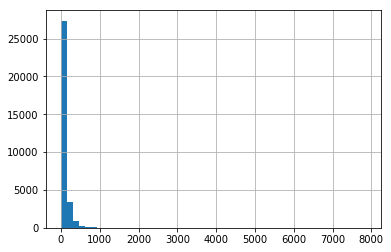

In [34]:
(100_000 * analyse_df.generaliste / analyse_df.NBPERSMENFISC15).hist(bins=50)

In [37]:
analyse_df['generaliste_habitants'] = (100_000 * analyse_df.generaliste / analyse_df.NBPERSMENFISC15)

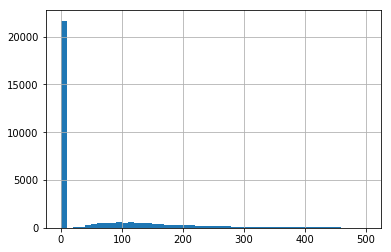

In [38]:
analyse_df.query('generaliste_habitants < 500').generaliste_habitants.hist(bins=50)